In [1]:
from compare import *
from packages import *
from ncl_cmap import *
from domain import *

## Plot the accumulated precipitation in WSM6 scheme for 2022 water year.

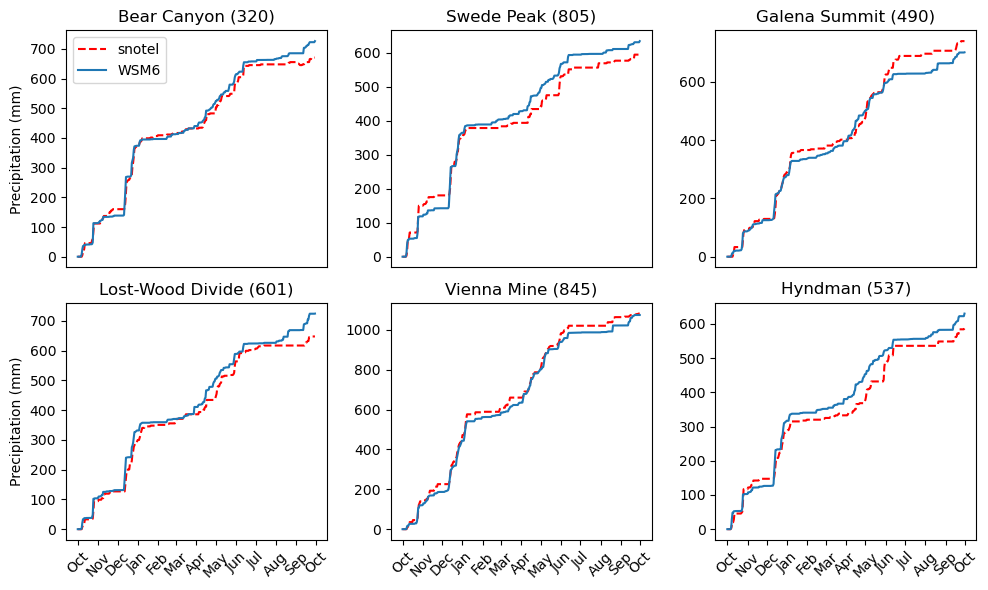

In [2]:
path = '/bsuhome/stanleyakor/Python-tutorial/wrf-python/'
path_2_wy_file = '/bsuhome/stanleyakor/wateryear_2022/'
path_geog_file= '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00'

wsm6_scheme = precip_snotel('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp1',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'WSM6_TEST', save = False)

wsm6_scheme.compare_smallest()

## Plot the accumulated precipitation over a select station, for all the microphysics schemes.

In [3]:
All_schemes = {
    'Morrison': path_2_wy_file + 'MORRISON_22_daily.nc',
    'WDM6': path_2_wy_file + 'WDM6_22_daily.nc',
    'Thompson': path_2_wy_file + 'Thompson_22_daily.nc'
    }


In [4]:
schemes = CompareScheme('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp1',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'precip_comp','WSM6', save = True)


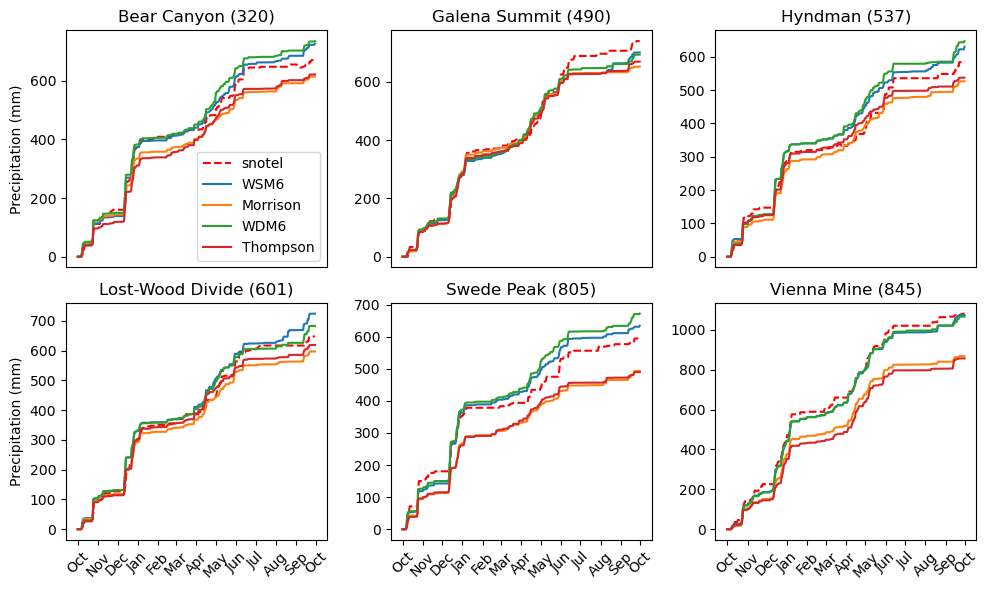

In [5]:
schemes.smallest(All_schemes)

## How do these schemes estimate snow water equivalent and snow height during the peak of accumulation season (January 12 according to snotel records)?

1) Snow Height

In [6]:
## collect snoda file for april 1 and regrid to wrf resolution
snodas_path = path + 'SNWZ_nonan_snodas_WY_22.nc'
snodas_file = regrid_snodas(path_geog_file, snodas_path, 'SNWZ', multiple_time = False)


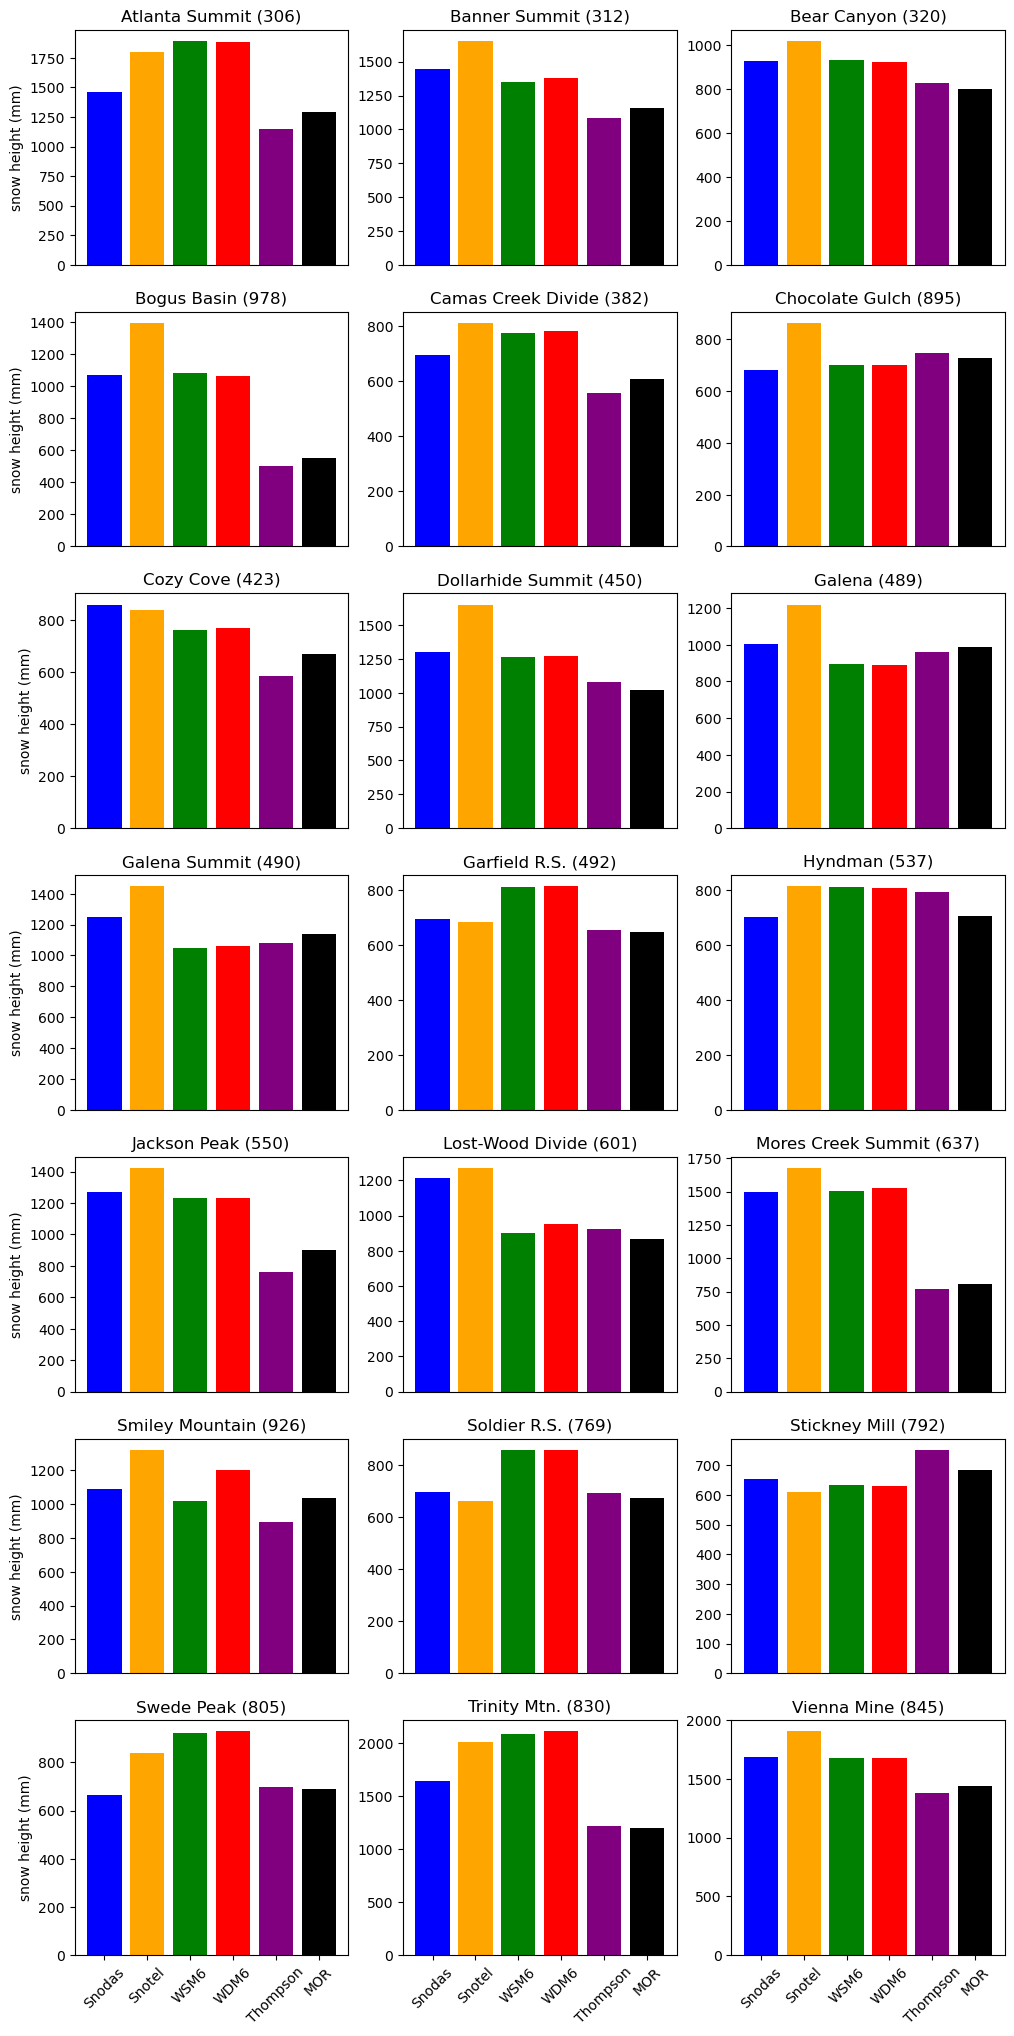

In [7]:

histogram = hist('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp2',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'station_sh_compare','WSM6', snodas_file,case='snowh',save = True)


histogram.make_plots(All_schemes,'snow height (mm)')

 2) SWE

In [8]:
## collect snoda file for april 1 and regrid to wrf resolution
snodas_path = path + 'SWE_nonan_snodas_WY_22.nc'
snodas_file_swe = regrid_snodas(path_geog_file, snodas_path, 'SWE', multiple_time = False)


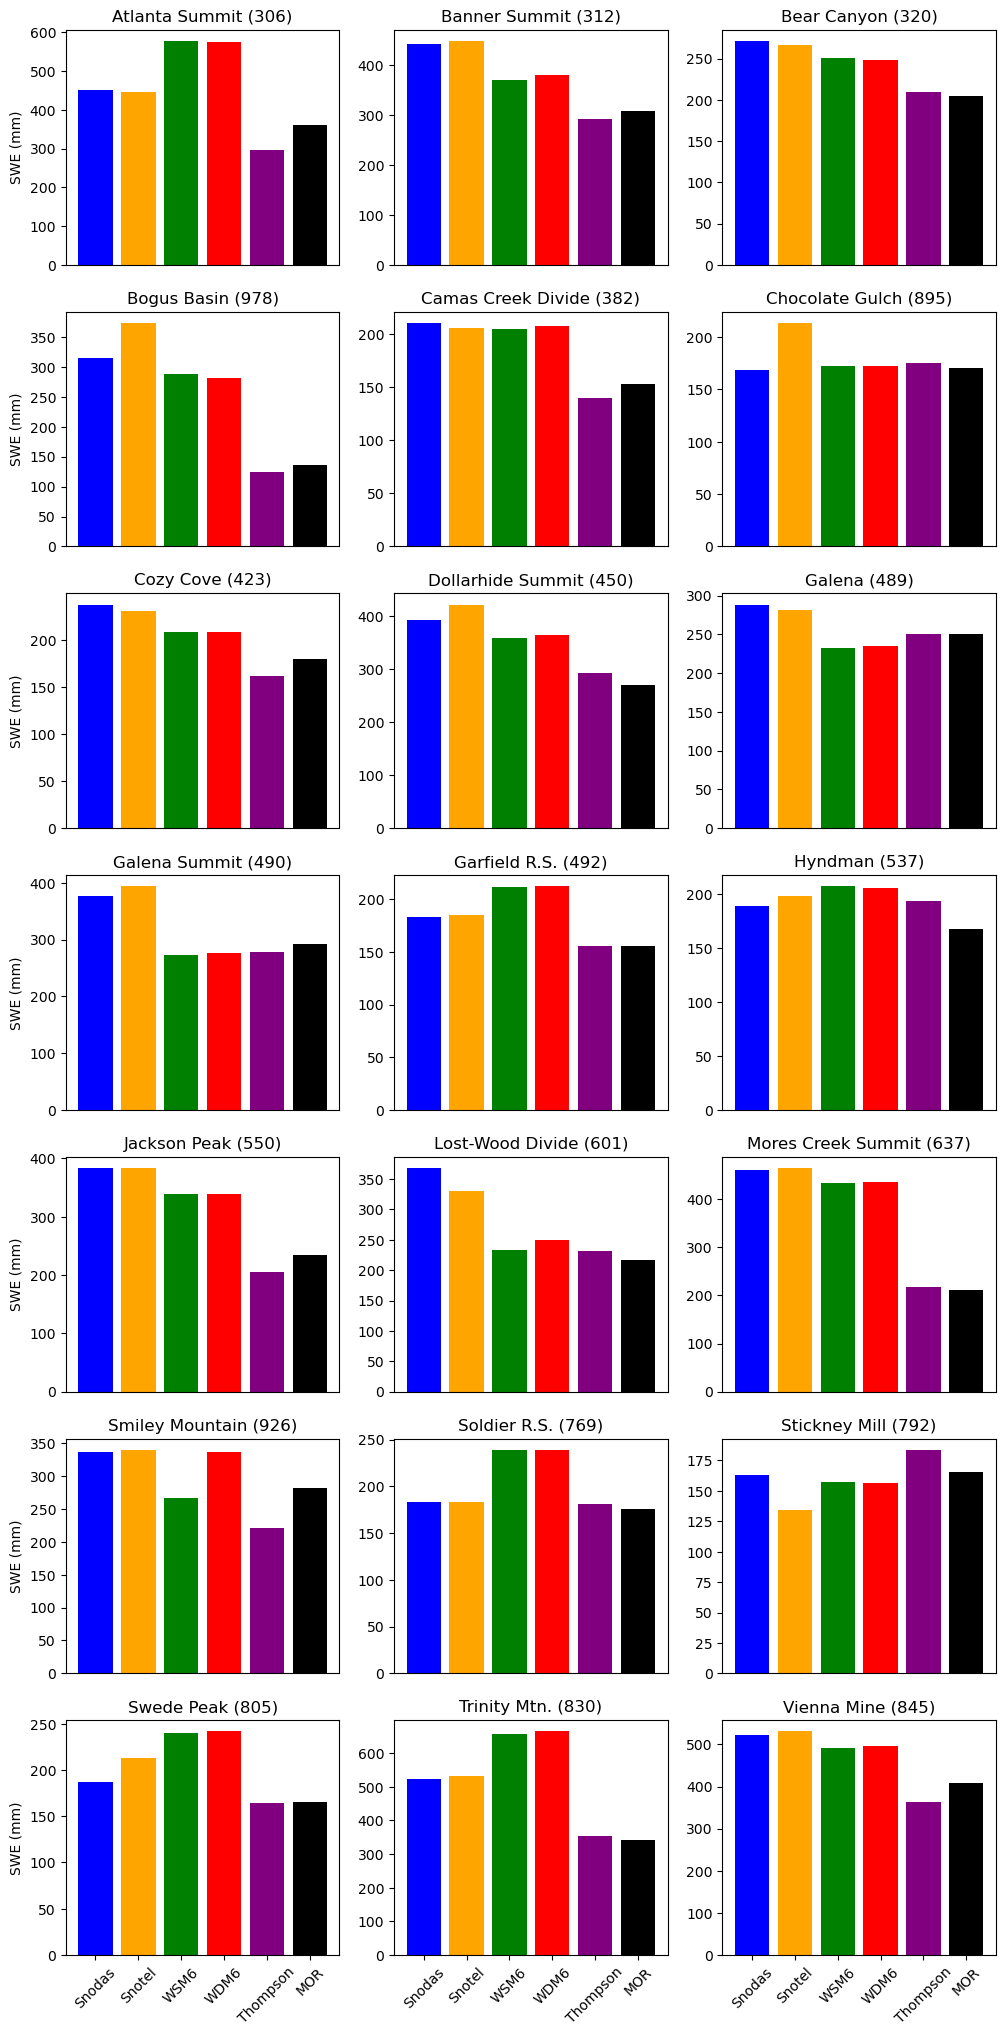

In [9]:

histogram = hist('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp2',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'station_swe_comp','WSM6', snodas_file_swe,case='swe',save = True)


histogram.make_plots(All_schemes,'SWE (mm)')

In [10]:
corr = station_corr('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp2',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'precip_comp','WSM6', save = True)


In [11]:
corr.make(All_schemes, type = 'KGE')

In [12]:
precip = pd.read_csv('precip_station_data.csv')
swe = pd.read_csv('swe_station_data.csv')
swh = pd.read_csv('swh_station_data.csv')

In [13]:
precip


,Name,WSM6_KGE,WDM6_KGE,Thompson_KGE,Morrison_KGE
0,Atlanta Summit (306),0.443629,0.474581,0.777479,0.860763
1,Banner Summit (312),0.862380,0.879485,0.821911,0.857127
2,Bear Canyon (320),0.935430,0.898775,0.877305,0.845656
3,Bogus Basin (978),0.498008,0.433593,0.680680,0.729763
4,Camas Creek Divide (382),0.609046,0.684670,0.710074,0.744069
5,Chocolate Gulch (895),0.838413,0.857967,0.881514,0.850340
6,Cozy Cove (423),0.806103,0.868205,0.802867,0.907128
7,Dollarhide Summit (450),0.386324,0.371196,0.790183,0.861929
8,Galena (489),0.929792,0.936719,0.963990,0.964396
9,Galena Summit (490),0.913261,0.928059,0.895519,0.896304


In [14]:
swe


,Name,WSM6_KGE,WDM6_KGE,Thompson_KGE,Morrison_KGE
0,Atlanta Summit (306),0.312334,0.313403,0.539893,0.716235
1,Banner Summit (312),0.801720,0.781627,0.673707,0.724284
2,Bear Canyon (320),0.905332,0.859618,0.811997,0.716598
3,Bogus Basin (978),0.649008,0.673466,-0.208578,-0.159604
4,Camas Creek Divide (382),0.649128,0.656052,0.186975,0.245154
5,Chocolate Gulch (895),0.449640,0.456037,0.567064,0.493560
6,Cozy Cove (423),0.684496,0.730590,0.441996,0.483450
7,Dollarhide Summit (450),0.810932,0.831325,0.513231,0.428408
8,Galena (489),0.664688,0.670263,0.811856,0.751878
9,Galena Summit (490),0.627153,0.650128,0.589789,0.624162


In [15]:
swh

,Name,WSM6_KGE,WDM6_KGE,Thompson_KGE,Morrison_KGE
0,Atlanta Summit (306),0.574344,0.579731,0.574210,0.711357
1,Banner Summit (312),0.788729,0.778974,0.697146,0.741122
2,Bear Canyon (320),0.877797,0.864293,0.783240,0.691580
3,Bogus Basin (978),0.690550,0.710301,-0.098154,-0.036087
4,Camas Creek Divide (382),0.700393,0.703979,0.309076,0.367125
5,Chocolate Gulch (895),0.473305,0.476796,0.591368,0.528474
6,Cozy Cove (423),0.648435,0.688174,0.469151,0.499264
7,Dollarhide Summit (450),0.779429,0.794421,0.540531,0.476697
8,Galena (489),0.572518,0.572976,0.710347,0.678054
9,Galena Summit (490),0.631650,0.650998,0.618891,0.649964


In [16]:
swe_th = swe.drop(columns=['Name'])

# Calculate the mean of the remaining columns
mean_values = swe_th.mean()

# Print the mean values
print(mean_values)

WSM6_KGE        0.702470
WDM6_KGE        0.707845
Thompson_KGE    0.492849
Morrison_KGE    0.530881
dtype: float64


In [17]:
swh_th = swh.drop(columns=['Name'])

# Calculate the mean of the remaining columns
mean_values = swh_th.mean()

# Print the mean values
print(mean_values)

WSM6_KGE        0.745378
WDM6_KGE        0.756612
Thompson_KGE    0.538267
Morrison_KGE    0.569017
dtype: float64


In [18]:
precip_th = precip.drop(columns=['Name'])

# Calculate the mean of the remaining columns
mean_values = precip_th.mean()

# Print the mean values
print(mean_values)

WSM6_KGE        0.741628
WDM6_KGE        0.762269
Thompson_KGE    0.795521
Morrison_KGE    0.815449
dtype: float64


In [19]:
station = precip_temp_compare('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp3',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'swh_timeseries','WSM6', save = True)


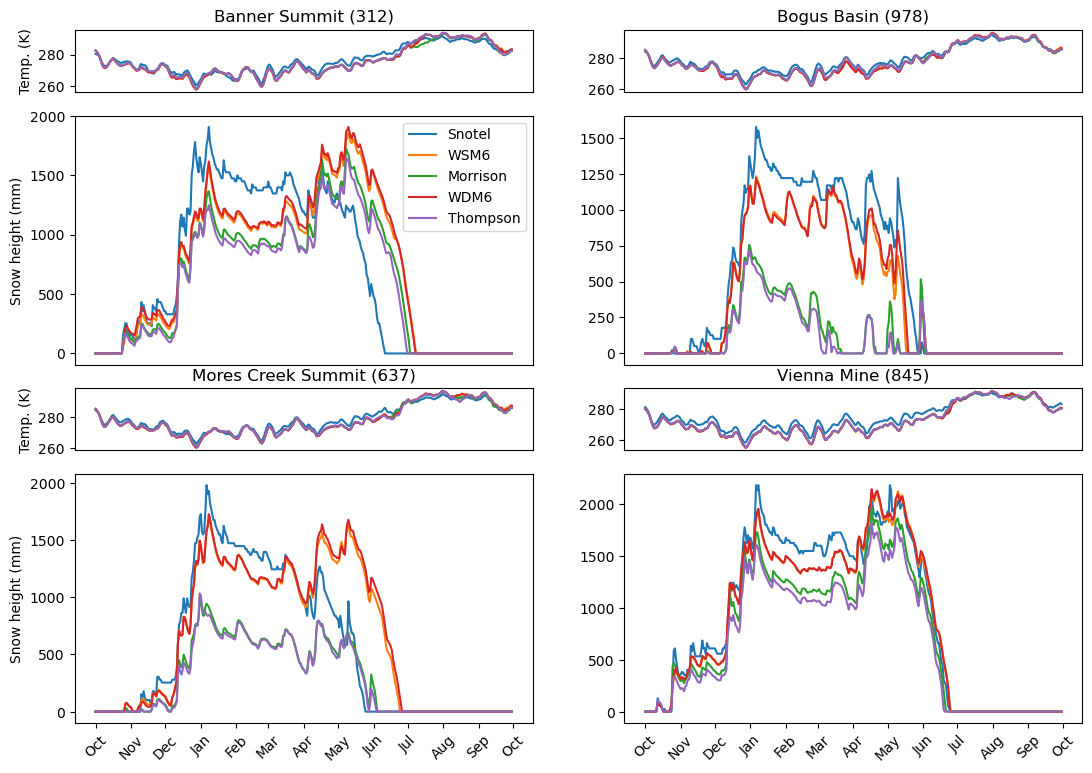

In [20]:
station.smallest(All_schemes)

In [21]:
schemes = wrf_snotel_average('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp3',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'average_sites','WSM6', save = True)


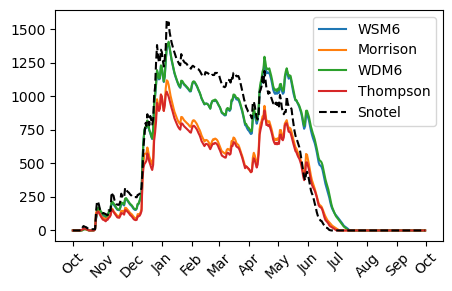

In [22]:
schemes.smallest(All_schemes)

In [23]:
# cmappcp = generate_NCL_cmap('WhiteBlueGreenYellowRed', cont_opt=True, cont_param_n=17, cont_param_ws='sRGB')#'WhiteBlueGreenYellowRed'#'precip3_16lev'


In [24]:
# d01_path = '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00'

# #get lat/lon grid
# la_lon = xr.open_dataset(d01_path)
# lat = la_lon['XLAT'].isel(Time = 0)
# lon = la_lon['XLONG'].isel(Time = 0)

In [25]:
# file_list = [path_2_wy_file+ 'Thompson_22_daily.nc', path_2_wy_file+ 'MORRISON_22_daily.nc',path_2_wy_file+ 'WSM6_22_daily.nc', path_2_wy_file+ 'WDM6_22_daily.nc']
# file_list = [(xr.open_dataset(file)['PRCP']).isel(XTIME=366)for file in file_list]
# title = ['Thompson', 'Morrison', 'WSM6', 'WDM6']

In [26]:
# make_snodas_Wrf_plots(file_list, title, lat, lon, save_title = 'accum_precip_spatial',label='Accumlated precip. (mm)', show=True,\
#                           subplots=(2,2), colour=cmappcp, size = (10, 15),save=False)